In [1]:
import pandas as pd
import numpy
import numpy as np
import math
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D
from numpy import hstack
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

## Load dataset

In [2]:
df_temp = pd.read_csv("weatherdata.csv", parse_dates= True, index_col= 1)
df_temp.head()

DATE  TEMP_MAX  TEMP_MIN  TEMP_AVG  PRES_AVG  PRES_MAX  \
MONTH                                                                   
JANUARY  2000-01-01      29.9      19.2     24.55      23.1      25.3   
JANUARY  2000-01-02      31.6      21.0     26.30      24.9      27.6   
JANUARY  2000-01-03      31.2      20.0     25.60      25.0      29.3   
JANUARY  2000-01-04      30.8      18.8     24.80      24.5      27.1   
JANUARY  2000-01-05      23.8      18.8     21.30      21.3      23.2   

         PRES_MIN  HUM_AVG  HUM_MAX  HUM_MIN  
MONTH                                         
JANUARY      18.5     80.0     96.0     55.0  
JANUARY      23.2     78.0     93.0     53.0  
JANUARY      23.3     83.0     99.0     54.0  
JANUARY      22.8     87.0     99.0     55.0  
JANUARY      19.2     87.0     96.0     72.0

## Global plot

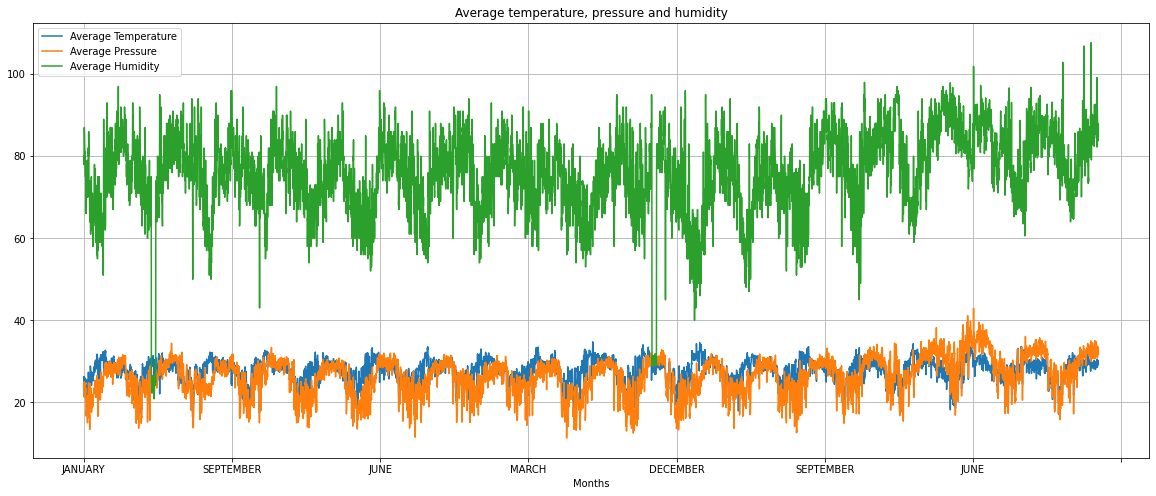

In [3]:
muestra = df_temp
plt.figure(figsize=(20,8))
muestra['TEMP_AVG'].plot(legend = True)
muestra['PRES_AVG'].plot(legend = True)
muestra['HUM_AVG'].plot(legend = True)
plt.title('Average temperature, pressure and humidity')
plt.xlabel('Months')
plt.legend(['Average Temperature','Average Pressure','Average Humidity'])
plt.grid()
plt.show()

## Process dataset
Split dataset into sequences and define train and prediction columns. In this case, predict average temperature through other measures: pressure and hummidity

In [4]:
step_days = 14
dataset = df_temp.filter(['HUM_MIN','HUM_AVG','HUM_MAX','PRES_MIN','PRES_AVG','PRES_MAX','TEMP_MIN','TEMP_AVG','TEMP_MAX']).values
dataset = np.array(dataset)

def split_sequences(sequences, n_steps):
    inputnn, target = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix + 1 > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix, (1,4,7)]
        inputnn.append(seq_x)
        target.append(seq_y)
    return array(inputnn), array(target)

inputnn, target = split_sequences(dataset, step_days)

## Split trainning tests

In [5]:
input_train, input_test, target_train, target_test = train_test_split(inputnn, target, test_size = 0.30, random_state=4,shuffle=True)

## Create model with long short-term memory layers

In [6]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences = True, input_shape = (step_days ,input_train.shape[2])))
model.add(LSTM(32, activation = 'relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3))#, activation='linear'
model.compile(optimizer = 'adam', loss = 'mse')
history = model.fit(input_train, target_train, validation_data = (input_test, target_test),batch_size = 16, epochs = 100)

Epoch 1/100
299/299 [==============================] - 10s 20ms/step - loss: 256.0896 - val_loss: 56.1137
Epoch 2/100
299/299 [==============================] - 5s 17ms/step - loss: 120.6812 - val_loss: 24.2409
Epoch 3/100
299/299 [==============================] - 5s 17ms/step - loss: 108.2228 - val_loss: 22.4801
Epoch 4/100
299/299 [==============================] - 5s 17ms/step - loss: 94.1160 - val_loss: 23.1439
Epoch 5/100
299/299 [==============================] - 5s 17ms/step - loss: 88.0025 - val_loss: 49.5925
Epoch 6/100
299/299 [==============================] - 5s 17ms/step - loss: 83.1416 - val_loss: 23.8074
Epoch 7/100
299/299 [==============================] - 5s 17ms/step - loss: 81.4232 - val_loss: 19.2294
Epoch 8/100
299/299 [==============================] - 8s 28ms/step - loss: 73.7842 - val_loss: 23.8711
Epoch 9/100
299/299 [==============================] - 7s 24ms/step - loss: 76.6325 - val_loss: 22.8235
Epoch 10/100
299/299 [==============================] - 8s 2

299/299 [==============================] - 3s 11ms/step - loss: 39.5450 - val_loss: 12.9777
Epoch 80/100
299/299 [==============================] - 4s 12ms/step - loss: 39.6940 - val_loss: 13.3484
Epoch 81/100
299/299 [==============================] - 5s 15ms/step - loss: 40.0963 - val_loss: 11.4355
Epoch 82/100
299/299 [==============================] - 5s 15ms/step - loss: 39.9902 - val_loss: 11.8044
Epoch 83/100
299/299 [==============================] - 4s 13ms/step - loss: 38.7746 - val_loss: 12.7571
Epoch 84/100
299/299 [==============================] - 4s 13ms/step - loss: 39.1181 - val_loss: 11.6502
Epoch 85/100
299/299 [==============================] - 4s 14ms/step - loss: 38.9173 - val_loss: 11.9967
Epoch 86/100
299/299 [==============================] - 3s 11ms/step - loss: 40.1074 - val_loss: 11.5808
Epoch 87/100
299/299 [==============================] - 3s 12ms/step - loss: 38.6419 - val_loss: 12.2474
Epoch 88/100
299/299 [==============================] - 4s 15ms/step

## Plot global RMSE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


5.925310009278391
3.416759133056885


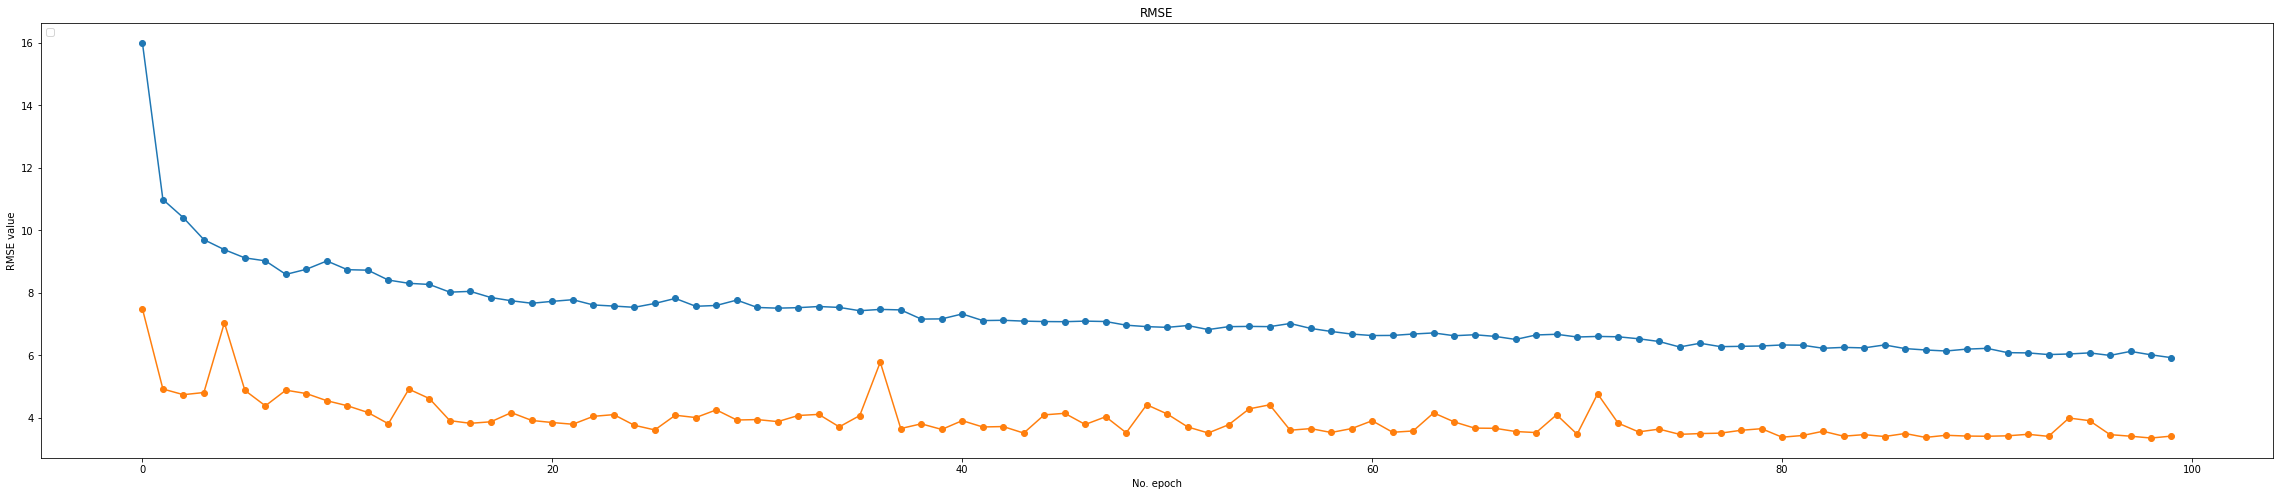

In [7]:
plt.figure(figsize=(40,8))
for i in range(0,100):
  history.history['loss'][i]= math.sqrt( history.history['loss'][i])
  history.history['val_loss'][i]=math.sqrt( history.history['val_loss'][i])
plt.plot( history.history['loss'], '-o')
plt.plot(history.history['val_loss'], '-o')
plt.title('RMSE')
plt.ylabel('RMSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
print(history.history['loss'][99])
print(history.history['val_loss'][99])
plt.show()

## Plot RMSE of the training split

In [8]:
prediction_train = model.predict(input_train)

RMSE = math.sqrt(np.square(np.subtract(prediction_train, target_train)).mean())

print("Root Mean Square Error Train:\n",RMSE)

Root Mean Square Error Train:
 3.500929250203572


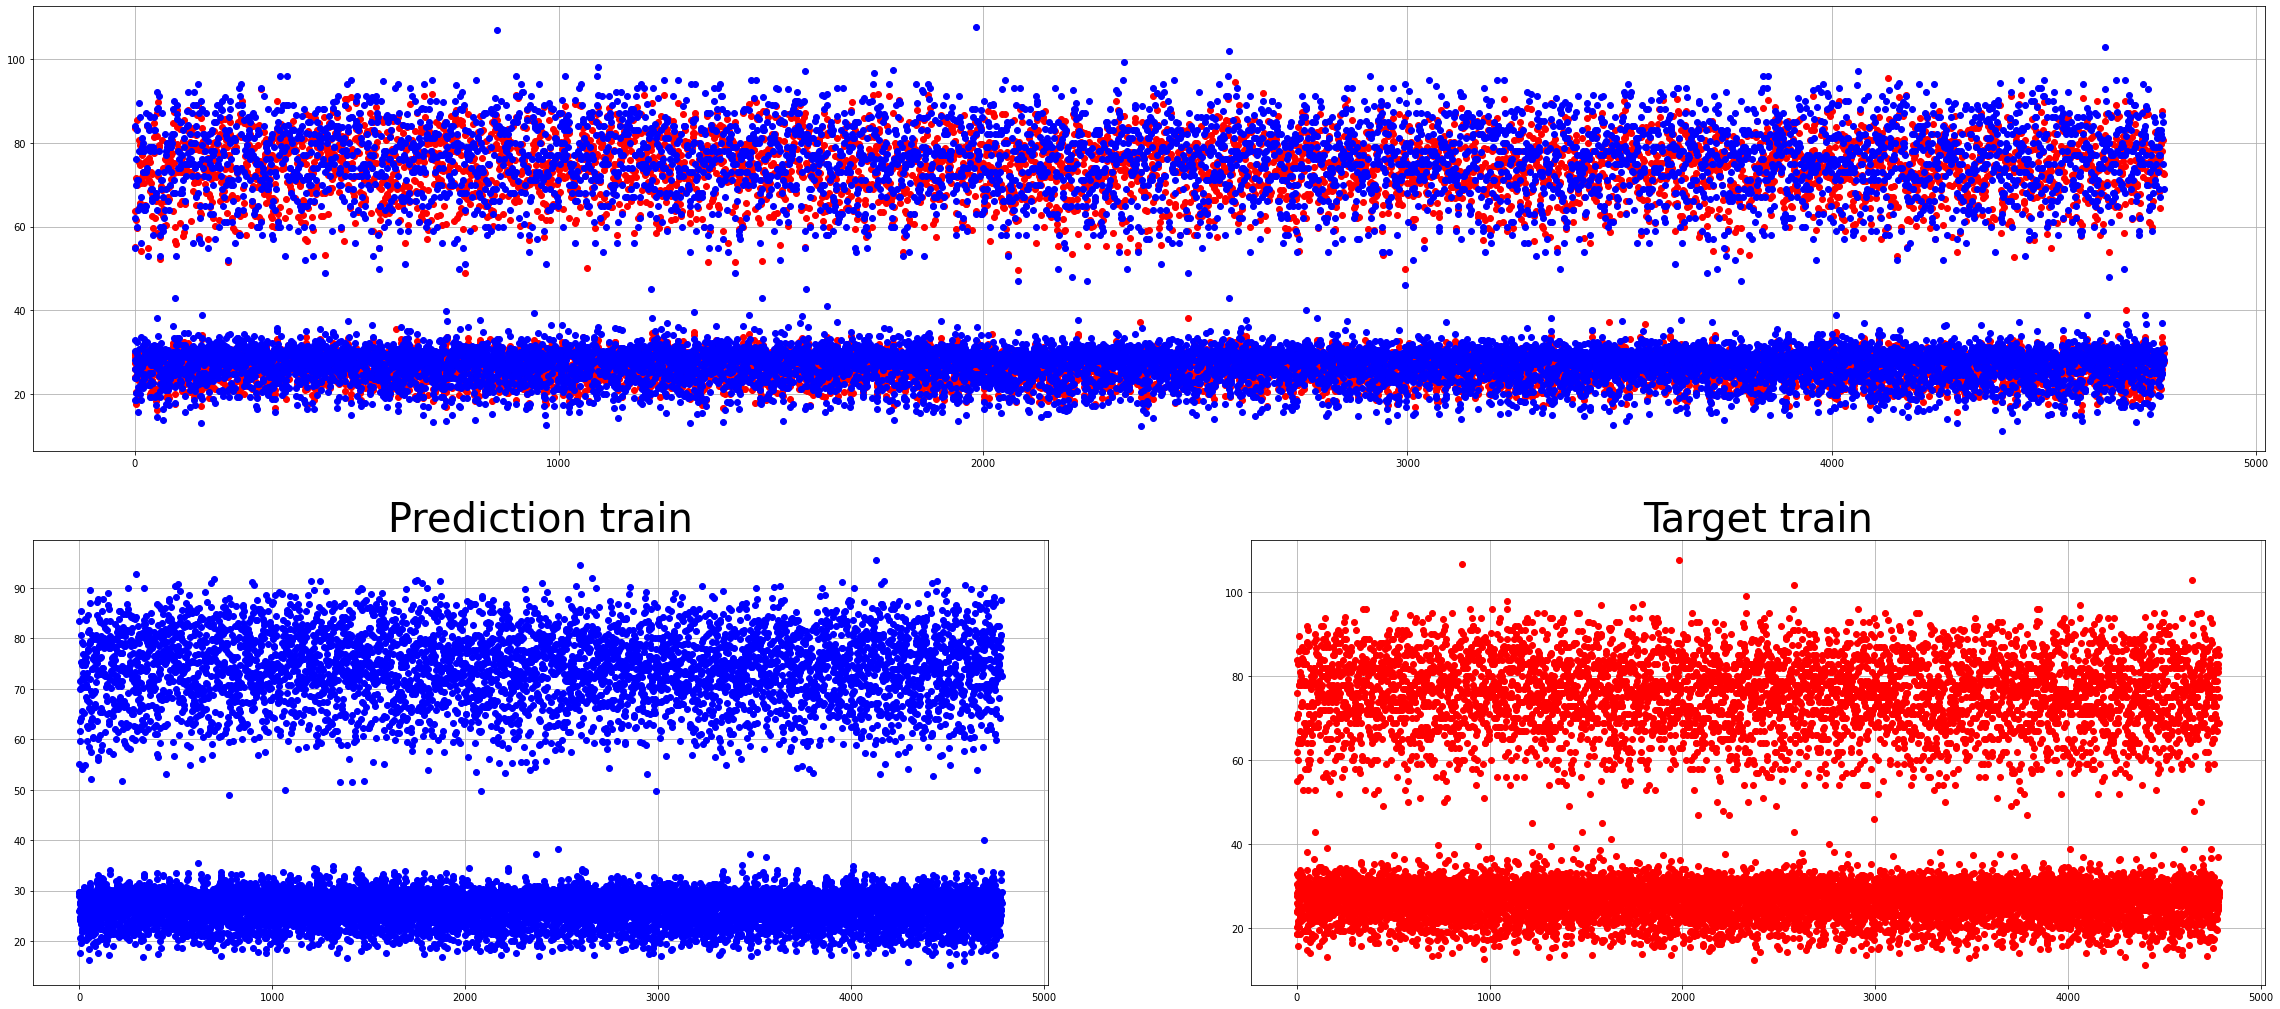

In [9]:
plt.figure(figsize=(40,18))
plt.subplot(2,1,1)
plt.plot(prediction_train, 'ro')
plt.plot(target_train, 'bo')
plt.grid()
plt.subplot(2,2,3)
plt.title("Prediction train", fontsize=40)
plt.plot(prediction_train, 'bo')
plt.grid()
plt.subplot(2,2,4)
plt.title("Target train", fontsize=40)
plt.plot(target_train, 'ro')
plt.grid()
plt.show()

## Plot RMSE of the test split

In [10]:
prediction = model.predict(input_test)

RMSE = math.sqrt(np.square(np.subtract(prediction, target_test)).mean())
 
print("Root Mean Square Error Train:\n", RMSE)

Root Mean Square Error Train:
 3.416759544233172


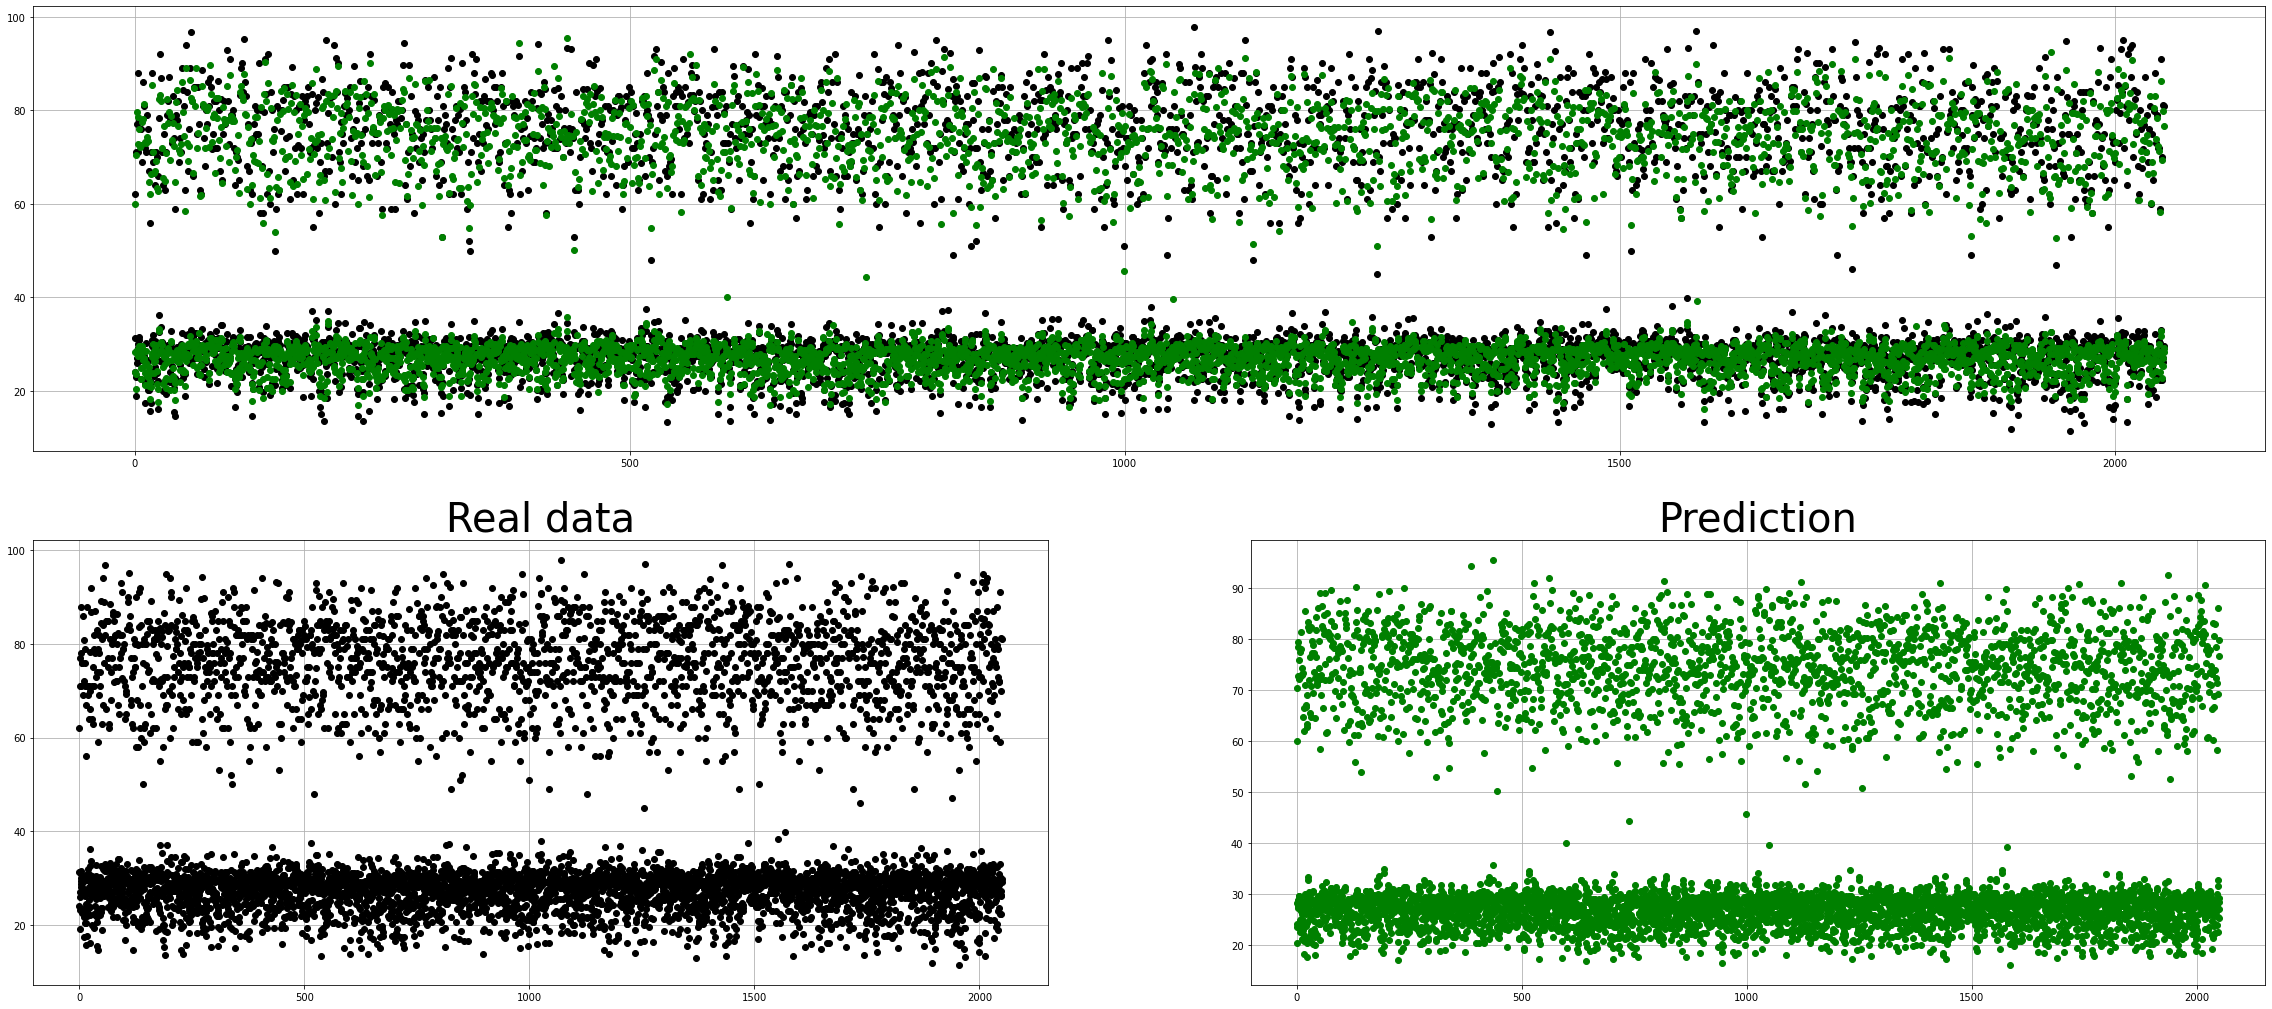

In [11]:
plt.figure(figsize=(40,18))
plt.subplot(2,1,1)
plt.plot(target_test, 'ko')
plt.plot(prediction, 'go')
plt.grid()
plt.subplot(2,2,3)
plt.title("Real data", fontsize=40)
plt.plot(target_test, 'ko')
plt.grid()
plt.subplot(2,2,4)
plt.title("Prediction", fontsize=40)
plt.plot(prediction, 'go')
plt.grid()
plt.show()

# Calculate correlation

In [12]:
#Definición de constantes y propiedades de los datos
slices = np.array((inputnn[:,:,1],inputnn[:,:,4],inputnn[:,:,7]))
#Se define como variable la longitud de los parámetros a tomar en cuenta presión, temperatura y humedad)
ncomponents=slices.shape[0]
#Se define la cantidad de ventanas como variable
winAmount=len(inputnn)
#Se define el último elemnto de los slices como variable
finalSlices = np.array(slices[:,winAmount-1,:])
#Eliminamos la última fila porque es justamente el target
slices = np.delete(slices,winAmount-1,axis=1)

In [47]:
#Definimos el método de comp, los parámetros  que recibe como n, i son el iterador de la ncomponents
#y la longitud de inputcnn. El uso de los iteradores es para recuperar el slice actual y el target, el cual es el último elemento
def comp(n, i):
    #Se utiliza el método de corrcoef de Numpy para calcular la correlación de Pearson. Se almacena en su respectivo componente
    pearson[n][i] = np.corrcoef(finalSlices[n],slices[n][i])[0][1]
    #Se utiliza el método linalg.norm de Numpy para calcular la correlación de Euclides. Se almacena en su respectivo componente
    euclides[n][i] = np.linalg.norm(finalSlices[n]-slices[n][i])

pearson,euclides,correlation=np.zeros((ncomponents,winAmount)),np.zeros((ncomponents,winAmount)),np.zeros((ncomponents,winAmount))
#Se utiliza la comprehensive list para iterar y ejecutar el método comp, mandando los iteradors
[comp(n,i) for n in range(ncomponents) for i in range(winAmount-1)]
#Empleamos un ciclo for para reasignar el dato más alto de euclides de cada componente
for i in range(ncomponents):
    euclides[i]=euclides[i]/max(euclides[i])
#Calculamos la correlación, empleando los resultados de los vectores de Pearson y Euclides con la fórmual siguiente descrita
#correlation = (.5+(pearson-2*euclides+1)/4)
correlation = 1-((.5+(pearson-2*euclides+1)/4))

In [48]:
#Sumamos de forma vertical los valores de la correlación de cada componente
#para convertir correlation en un  vector unidimensional
correlation = np.sum(((correlation +.5)**2), axis=0)
#Posible reducción a eliminar maximo y dejarlo integrado en la división
correlation /= max(correlation)

#    # Th

In [49]:
#Obtenemos en  un diccionario los datos de correlation que sean mayor a la condicional 
#Guardamos como llave al iterador de la posición  original del arreglo slice y como item el dato de correlation
diccionario = {i: corr for i, corr in enumerate(correlation) if corr>.7}
#convertimos los valores del diccionario a una lista para crear un arreglo con los datos y usarlos más adelante
thresholded=np.asarray(list(diccionario.values()))

In [50]:
thresholded0 = np.empty(len(correlation))
for i,n in enumerate(correlation):
    if n > .7:
        thresholded0[i] = n
    else:
        thresholded0[i] = 0

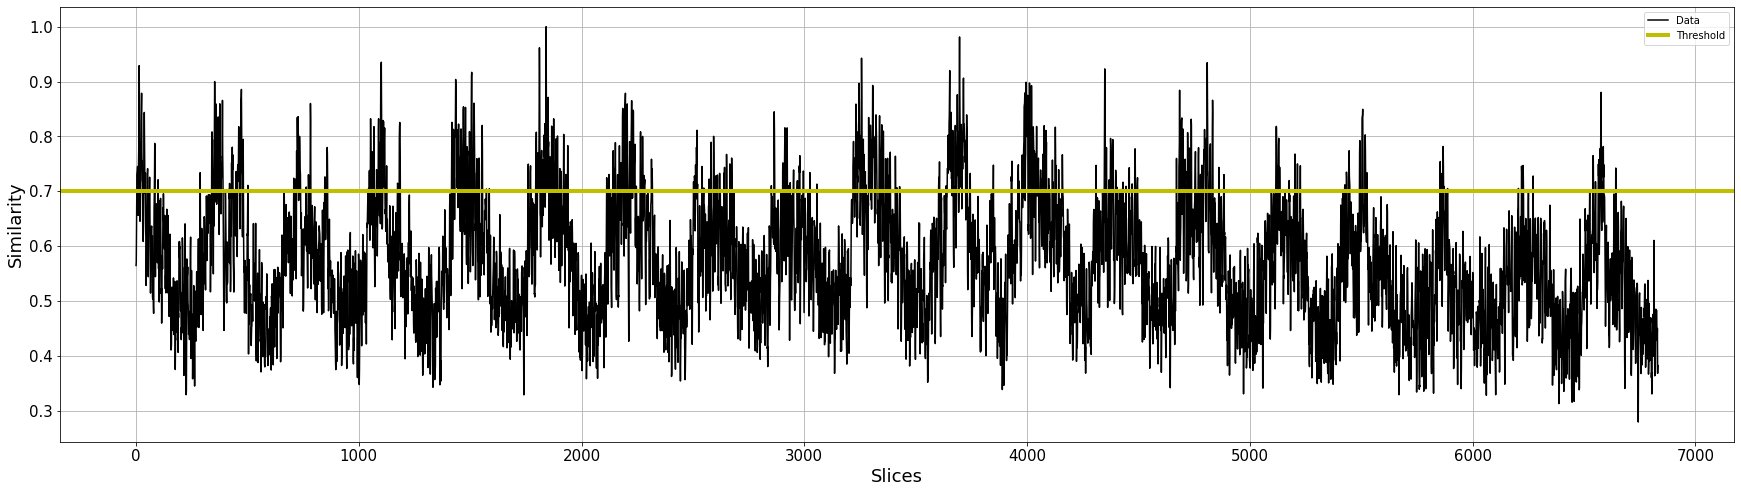

In [55]:
plt.figure(figsize=(30,8))
plt.plot(correlation,'k', label='Data')
plt.axhline(.7, color='y',linewidth=4,label='Threshold')
plt.ylabel('Similarity',fontsize=18)
plt.xlabel('Slices',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.show()

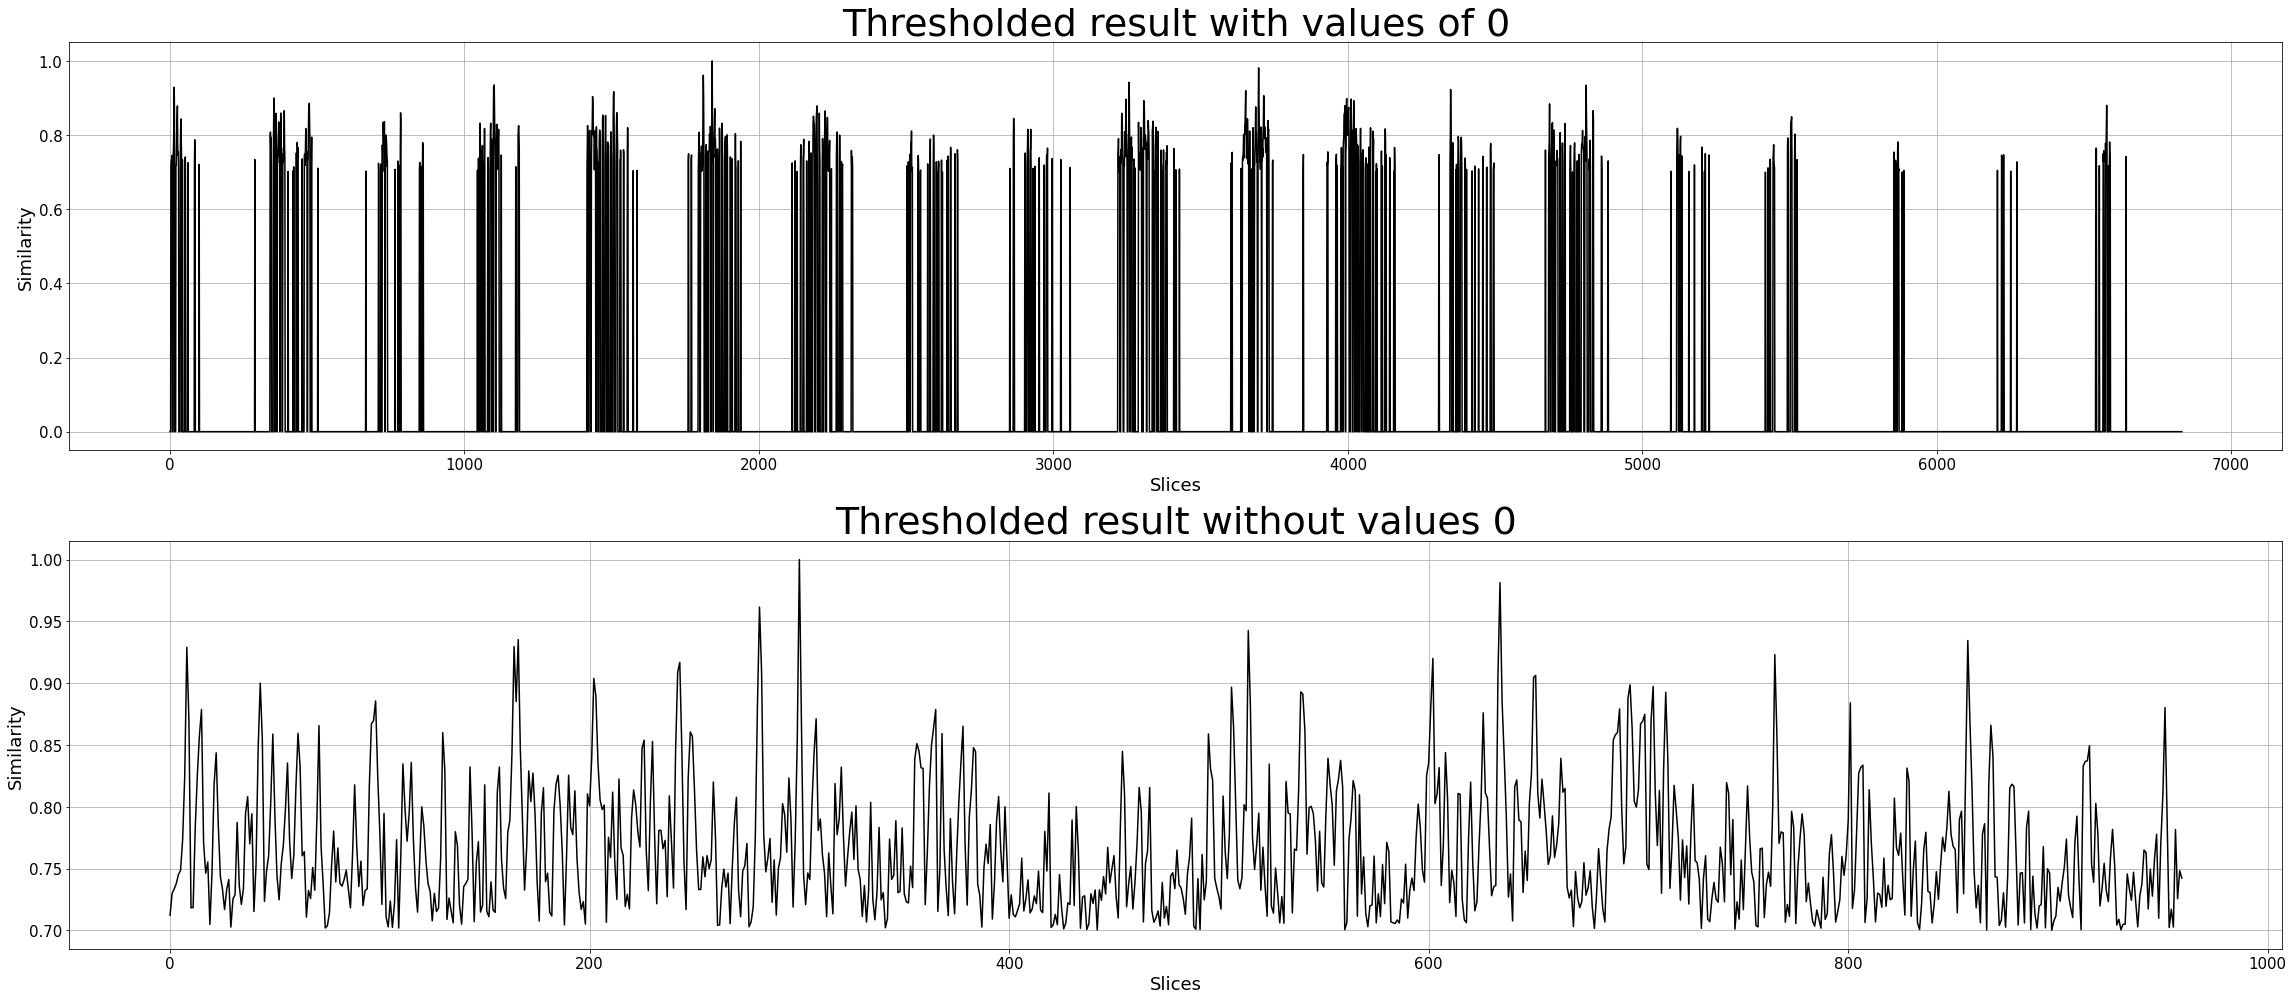

In [56]:
plt.figure(figsize=(32,14))
plt.subplot(2,1,1)
plt.plot(thresholded0,'k')
plt.title("Thresholded result with values of 0", fontsize= 38)
plt.ylabel('Similarity',fontsize=18)
plt.xlabel('Slices',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.subplot(2,1,2)
plt.plot(thresholded,'k')
plt.title("Thresholded result without values 0", fontsize= 38)
plt.ylabel('Similarity',fontsize=18)
plt.xlabel('Slices',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.tight_layout()
plt.show() 

# Lowpass filter

In [57]:
from scipy.signal import butter, filtfilt, freqz

def butter_lowpass(cutoff, fs, order=5):
    normal_cutoff = cutoff / (0.5*fs)
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    return filtfilt(b, a, data)

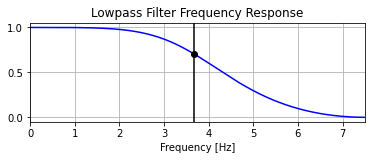

In [87]:
order = 2
fs = 15.0     
cutoff = 3.667 
b, a = butter_lowpass(cutoff, fs, order)
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [120]:
lista = []
filtered_n = butter_lowpass_filter(thresholded, cutoff, fs, order)
n=0
for i in range(150):
    filtered_n = butter_lowpass_filter(filtered_n, cutoff, fs, order)
    lista.append(filtered_n)
while(np.corrcoef(lista[n],lista[n-100])[0][1]<.999):
    print(np.corrcoef(lista[n],lista[n-100])[0][1])
    filtered_n = butter_lowpass_filter(filtered_n, cutoff, fs, order)
    lista.append(filtered_n)
    n+=1
n+=150

0.854277736772384
0.872711596065764
0.8864292428341386
0.8972389194203483
0.9060476711334765
0.913389575216611
0.9196099927968527
0.924947085273359
0.9295730161898917
0.9336167484471574
0.9371775656923925
0.9403335573499423
0.9431471979449608
0.945669161841398
0.9479410183956907
0.9499971895104913
0.9518664051919433
0.9535728076864635
0.9551368034834321
0.9565757304820219
0.9579043870705629
0.9591354563117169
0.9602798492704341
0.9613469852020553
0.9623450218698345
0.963281046073554
0.9641612321486659
0.9649909744778948
0.9657749987691776
0.9665174558755972
0.9672220011813227
0.9678918619939442
0.9685298949260257
0.9691386348868231
0.9697203370166465
0.9702770126647011
0.9708104603240333
0.9713222922849861
0.9718139576441017
0.9722867622031733
0.9727418857087341
0.9731803968123137
0.9736032660735845
0.9740113772798896
0.9744055373149503
0.9747864847752673
0.9751548975039432
0.9755113991872149
0.9758565651383879
0.9761909273762778
0.9765149790903948
0.9768291785723356
0.9771339526820263

In [121]:
n

590

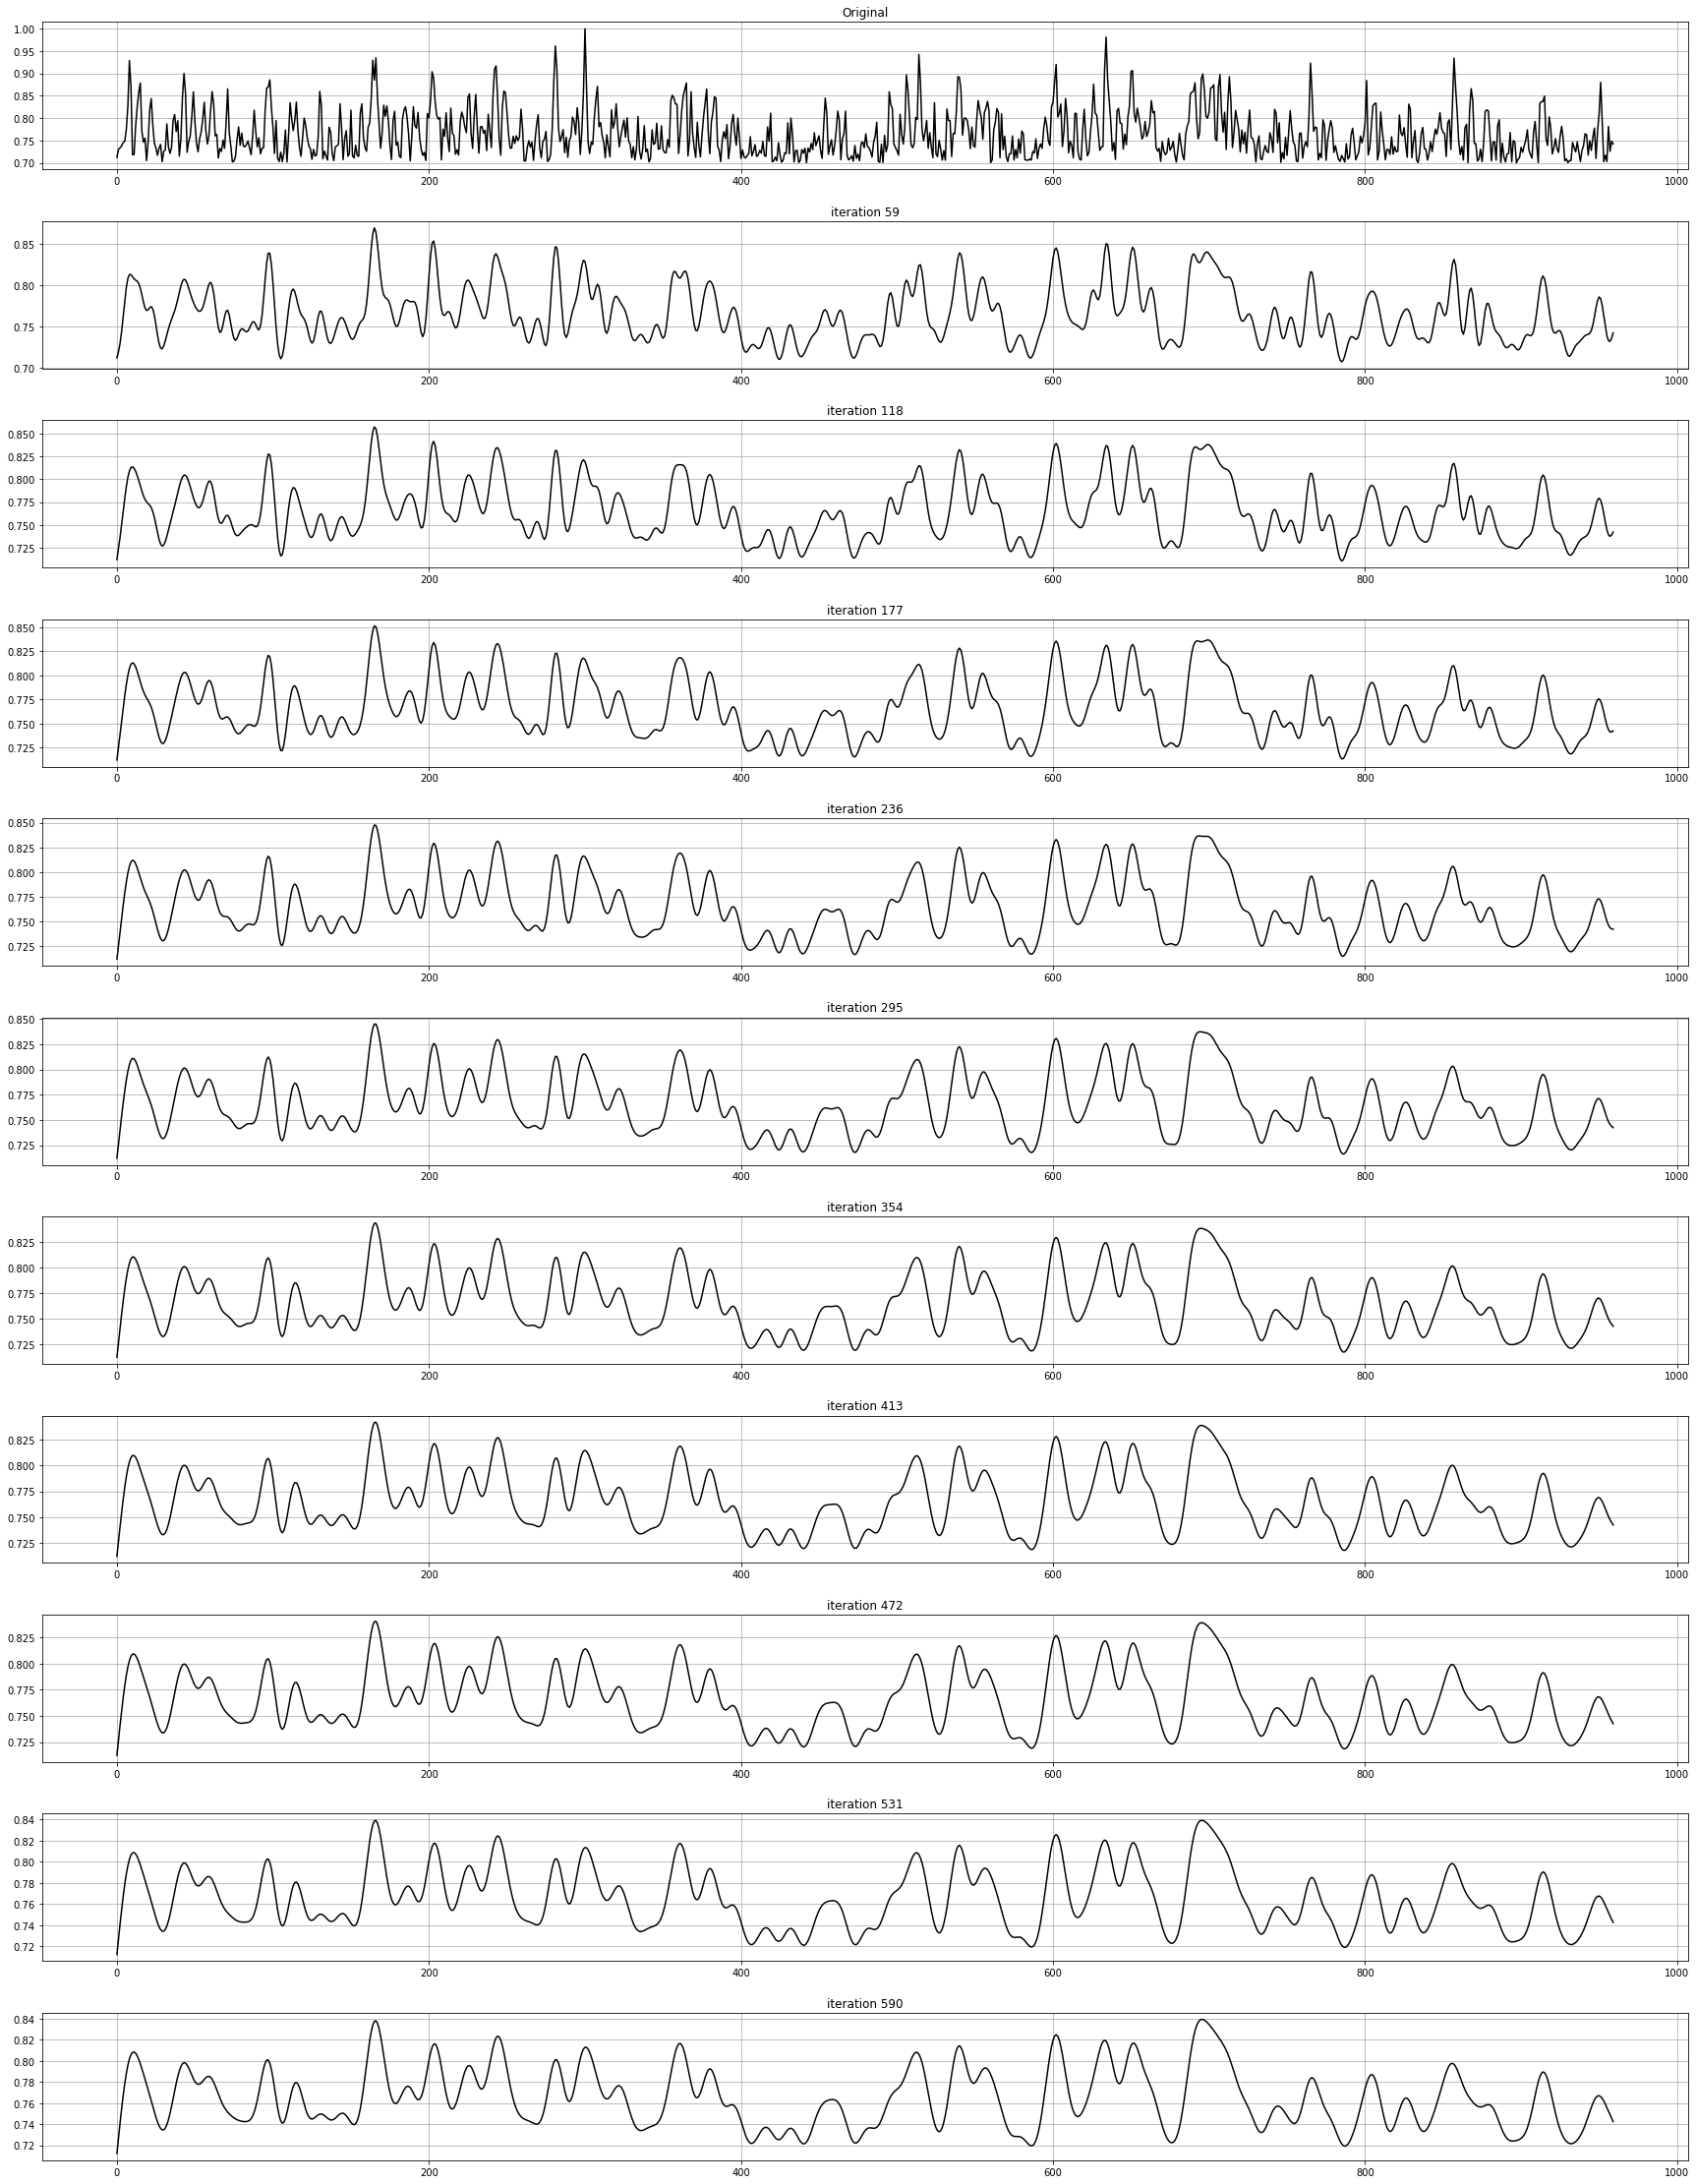

In [122]:
plt.figure(figsize=(30,40))
plt.subplot(11,1,1)
plt.plot(thresholded, 'k')
plt.title("Original")
plt.grid()
n//=10
j=2
#usar tercer parámetro del range

for i in range(n,len(lista),n):
    plt.subplot(11,1,j)
    plt.plot(lista[i], 'k')
    plt.title("iteration "+str(i))
    plt.grid()
    j+=1
plt.subplot(11,1,11)
plt.plot(lista[len(lista)-1], 'k')
plt.title("iteration "+str(n*10))
plt.grid()
plt.subplots_adjust(hspace=.35)
plt.show()

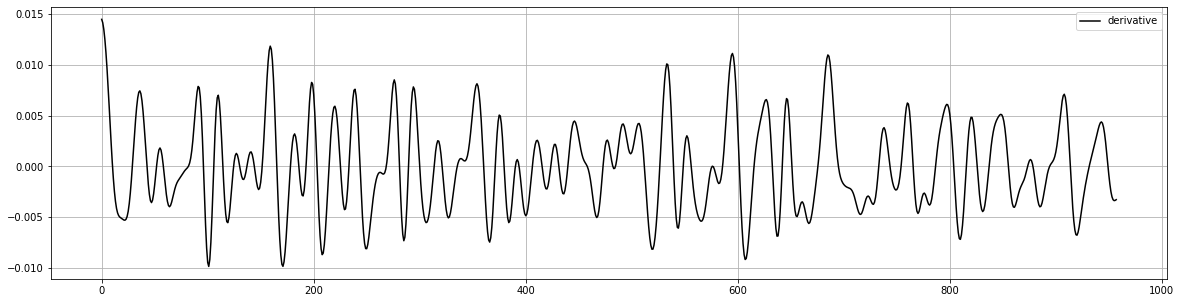

In [123]:
#al utilizar pop eliminamos el último dato de la lista, así que ahora el importante es derivative
derivative = np.diff(lista.pop())
#Obviously borramos el último dato ya que este se vuelve 1 al derivar
derivative=np.delete(derivative, len(derivative)-1)
#Borramos el primer y último elemento del diccionario, ya que estos se pierden al derivar
diccionario.popitem()
diccionario.pop(list(diccionario.keys())[0])
for i, clave in enumerate(diccionario):
    diccionario[clave]=derivative[i]
plt.figure(figsize=(20,5))
plt.plot(derivative, 'k', label='derivative')
plt.grid()
plt.legend()
plt.subplots_adjust(hspace=.35)
plt.show()

In [124]:
#Módulo para agrupar las ventanas depediendo de la derivada numérica
subDic = {}  #lista que contiene la lista del grupo de ventanas
listas = []  #lista que contiene las sublistas de los grupos de ventana
flag=1
for i,clave in enumerate(diccionario):
    #si la derivada numérica es mayor a 0 e incrementFlag es a 1, se agrega a la sublista actual
    if diccionario[clave] >= 0:
        subDic[clave] = diccionario[clave]
        if flag==0:
            listas.append(subDic)
            subDic = {}
        flag=1
        #si es menor a 0, se setea incrementFlag a 0 y se agregan los siguientes dos
        #valores para concluir la sublista en el último caso.
    elif diccionario[clave] < 0:
        if flag ==1:
            listas.append(subDic)
            subDic = {}
        flag = 0
        subDic[clave] = diccionario[clave]
        try:
            subDic[list(diccionario.keys())[i+1]]=diccionario[list(diccionario.keys())[i+1]]
        except Exception:
            print("catched")
        #en caso de  que vuelva a ser mayor a 0 porque ha empezado a subir,
        #se setea a 1 incrementFlag, se agrega la sublista y se instancia de nuevo sublista
listas.append(subDic)

catched


# Derivada

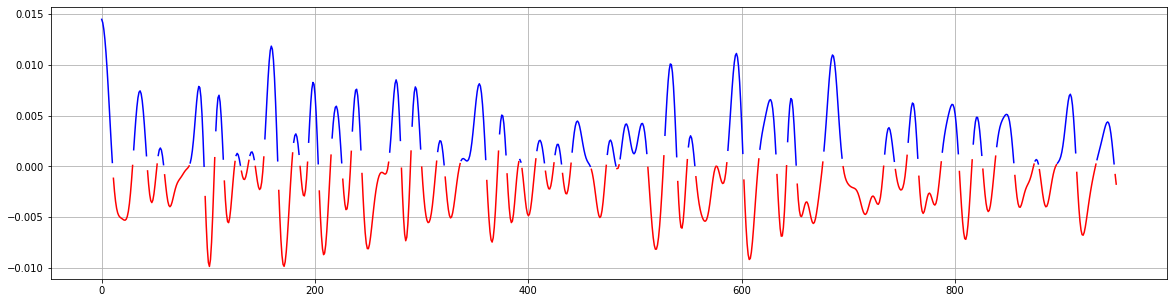

In [154]:
plt.figure(figsize=(20,5))
cont=0
listasP = []
listasN = []
for i in range(len(listas)):
    if(i%2):
        plt.plot(np.arange(len(list(listas[i].values())))+cont,list(listas[i].values()), 'r')
        listasN.append(listas[i])
        cont+=len(list(listas[i].values()))
    else:
        plt.plot(np.arange(len(list(listas[i].values())))+cont,list(listas[i].values()), 'b')
        listasP.append(listas[i])
        cont+=len(list(listas[i].values()))

plt.grid()
plt.show()

In [155]:
dicTop10={}
listasP.pop(25)
for i in listasP:
    dicTop10[list(i.keys())[-1]]=correlation[list(i.keys())[-1]]
dictTop3 = OrderedDict(sorted(dicTop10.items(), key=lambda x: x[1]))
listTop3=list(dictTop3.keys())

In [156]:
maxHum,minHum=max(dataset[:,1]),min(dataset[:,1])
maxPre,minPre=max(dataset[:,4]),min(dataset[:,4])
maxTem,minTem=max(dataset[:,7]),min(dataset[:,7])
predH=(prediction[2049][0]-minHum)/(maxHum-minHum)
predP=(prediction[2049][1]-minPre)/(maxPre-minPre)
predT=(prediction[2049][2]-minTem)/(maxTem-minTem)
cont=0
MAE = []
corrList=[]
for i in listTop3[-10:]:
    corrList.append(correlation[i])
    actualDayH=((slices[0][i+1][13])-minHum)/(maxHum-minHum)
    actualDayP=((slices[1][i+1][13])-minPre)/(maxHum-minPre)
    actualDayT=((slices[2][i+1][13])-minTem)/(maxHum-minTem)
    print((abs(predH-actualDayH)+abs(predP-actualDayP)+abs(predT-actualDayT))/3)
    MAE.append((abs(predH-actualDayH)+abs(predP-actualDayP)+abs(predT-actualDayT))/3)
    cont+=(abs(predH-actualDayH)+abs(predP-actualDayP)+abs(predT-actualDayT))/3
print("promedio",cont/10)
cont=0

0.34712899973780437
0.44070719352651616
0.3734887991947371
0.41058701470319053
0.3797134227266241
0.39057632760447003
0.36789800891504054
0.39118065426075654
0.39356148577203603
0.34615014971457064
promedio 0.3840992056155746


In [78]:
corrList

[0.7706253926296336,
 0.7892135856964358,
 0.7933456825971186,
 0.8056278903548758,
 0.8316057999527527,
 0.84540766120981,
 0.8494154025840565,
 0.8544386932127236,
 0.8690066910255563,
 0.9230280994623777]

1


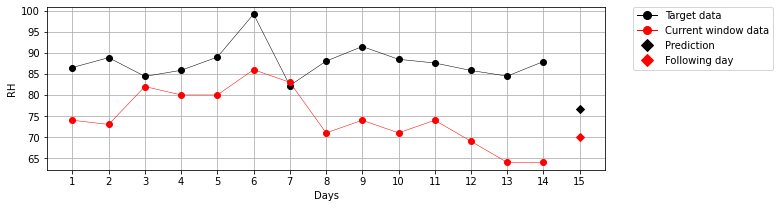

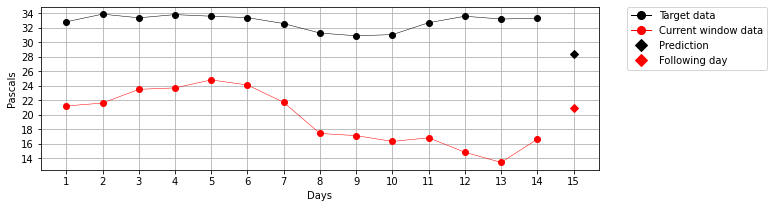

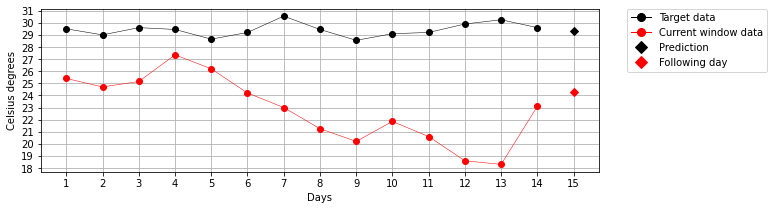

2


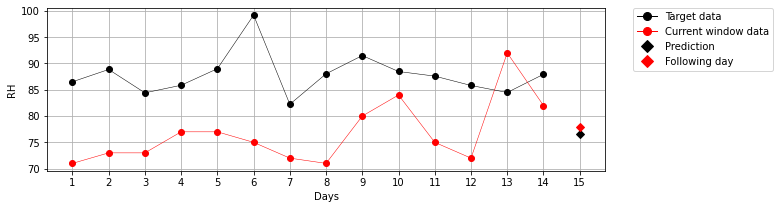

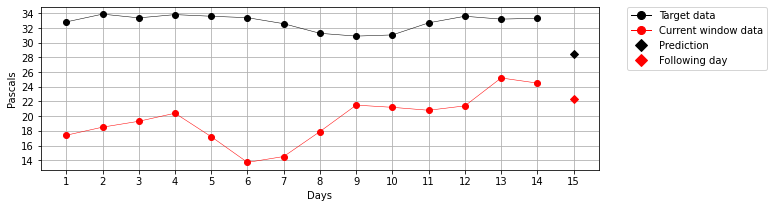

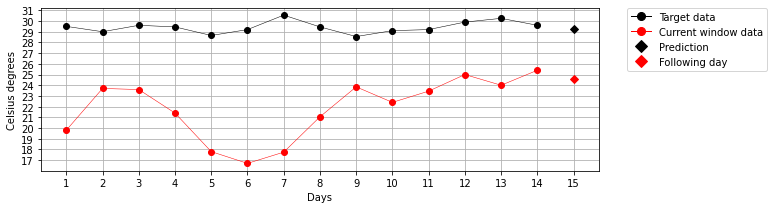

3


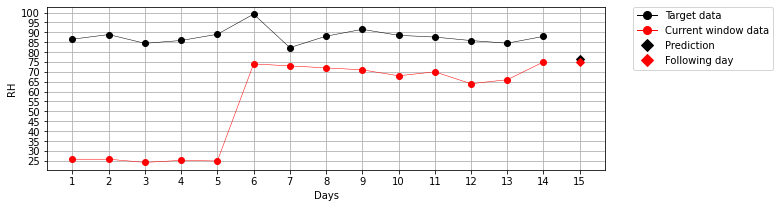

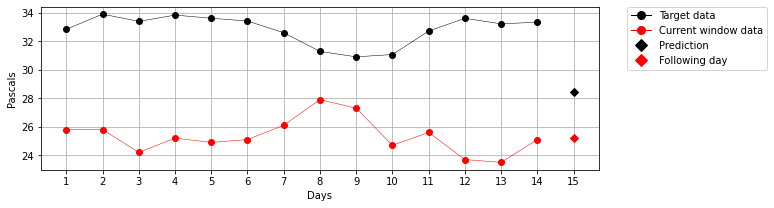

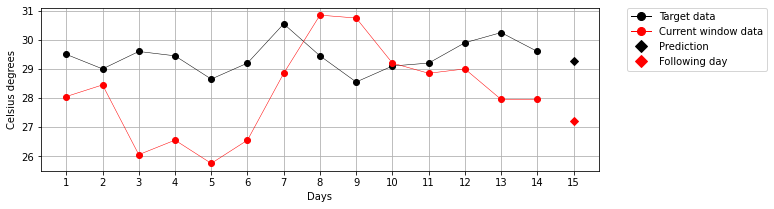

4


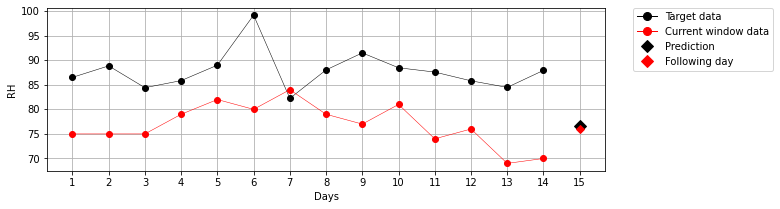

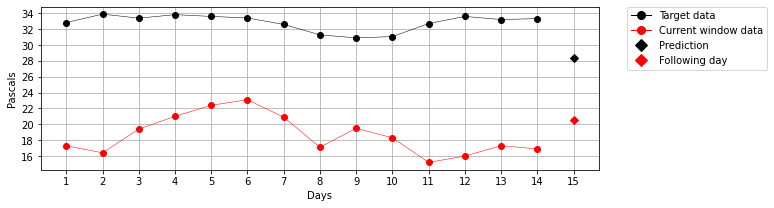

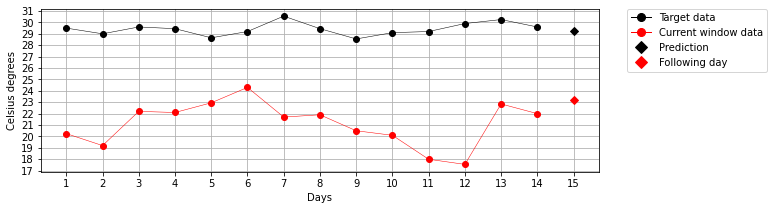

5


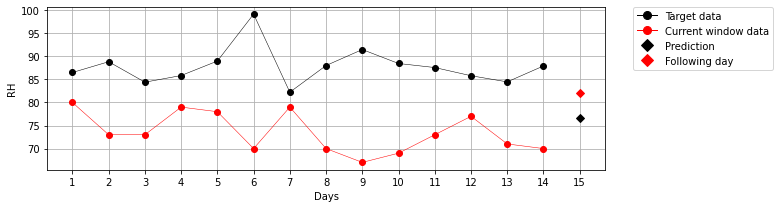

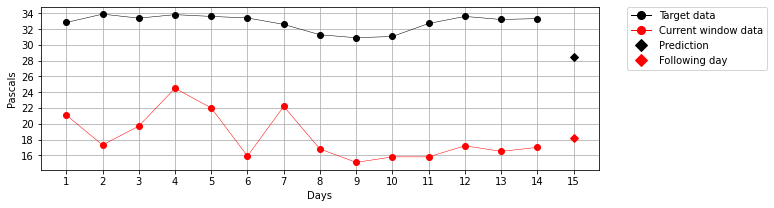

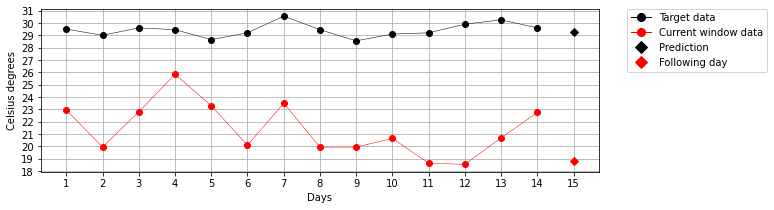

6


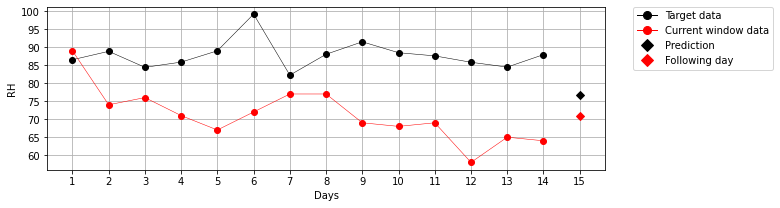

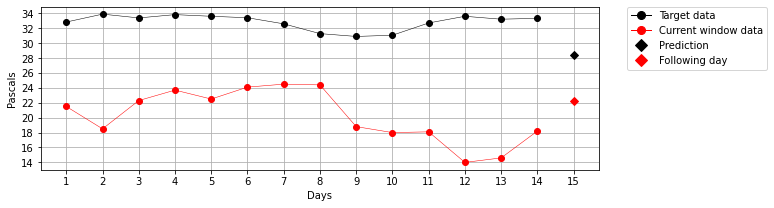

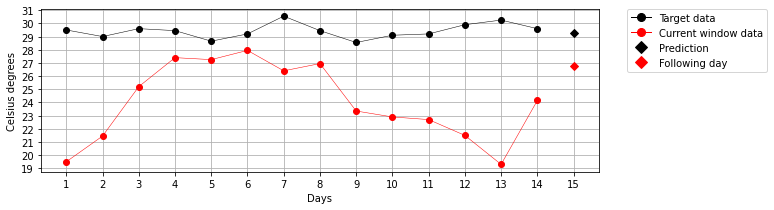

7


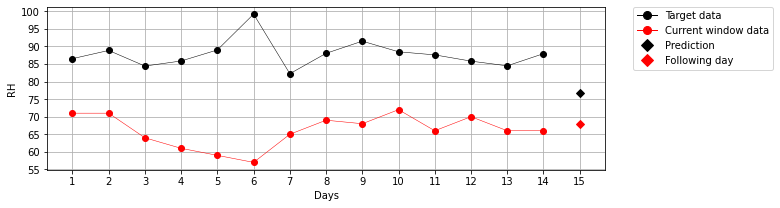

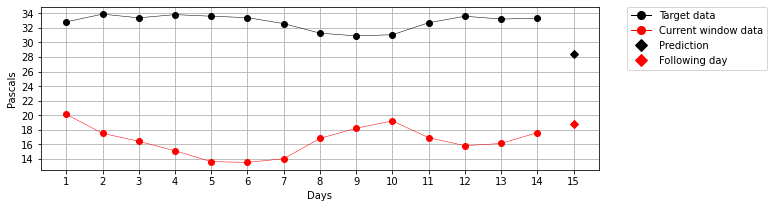

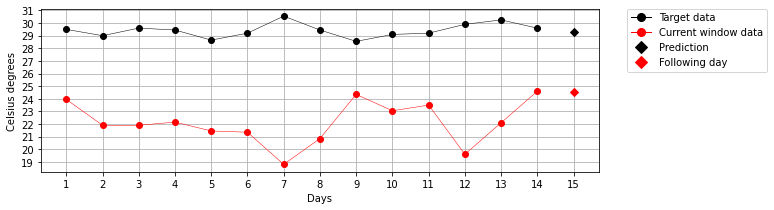

8


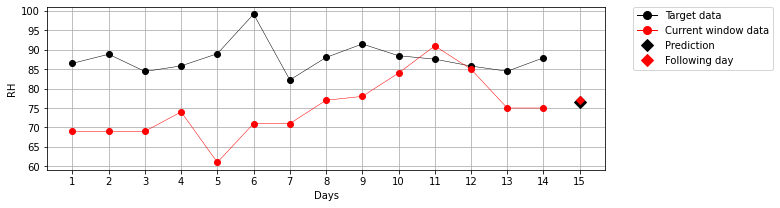

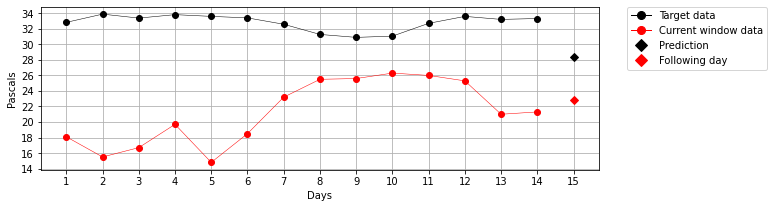

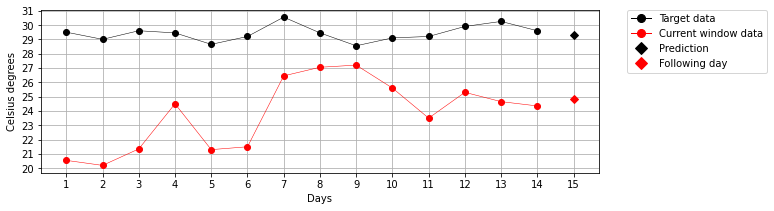

9


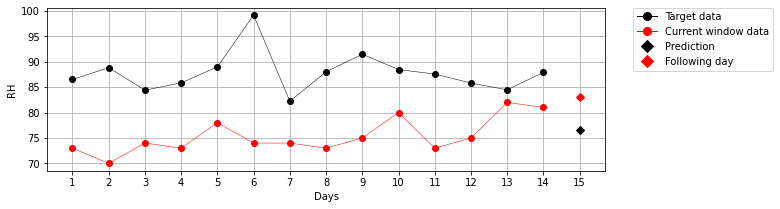

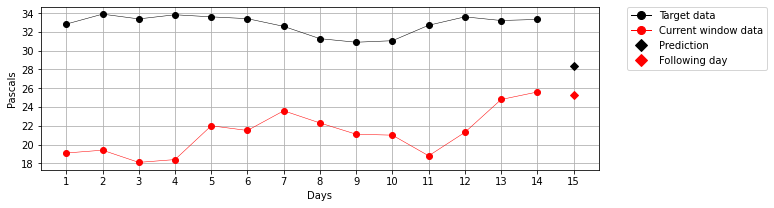

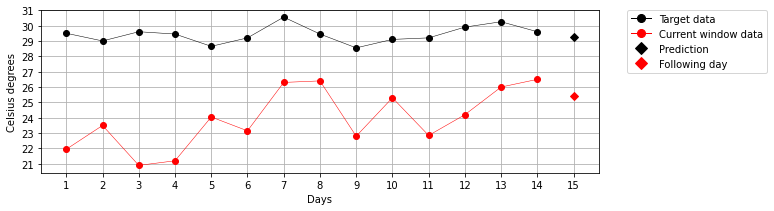

10


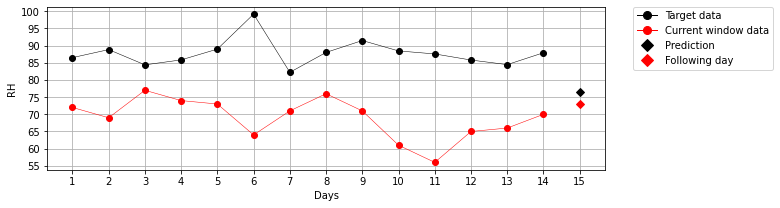

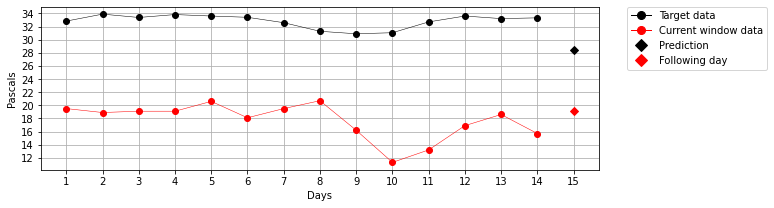

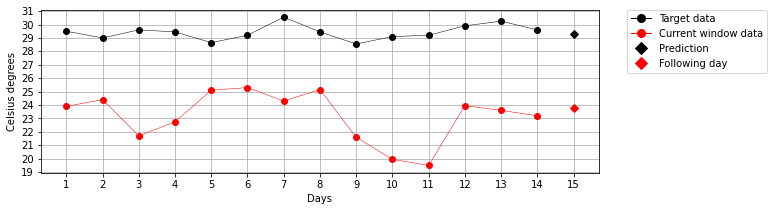

11


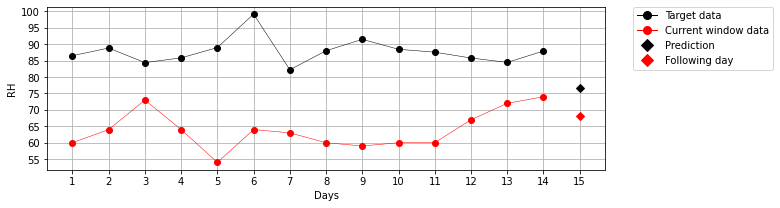

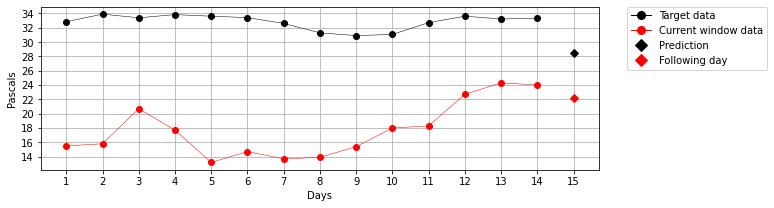

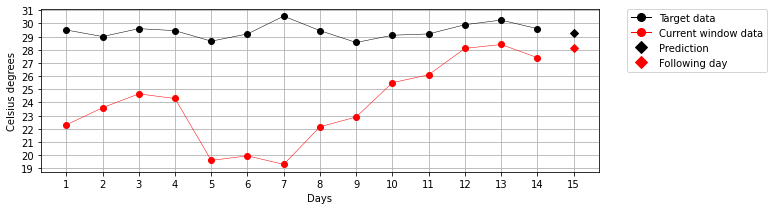

12


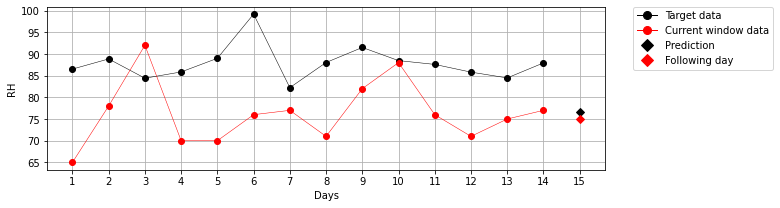

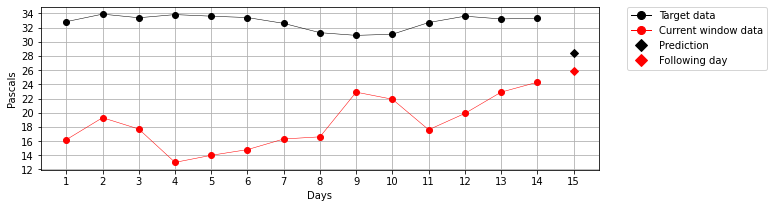

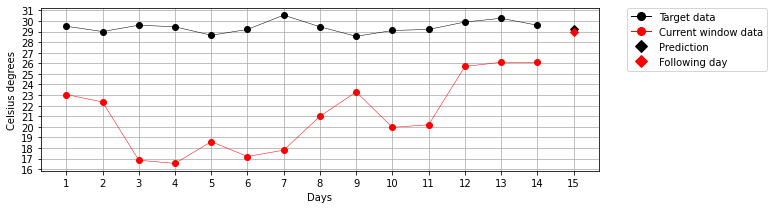

13


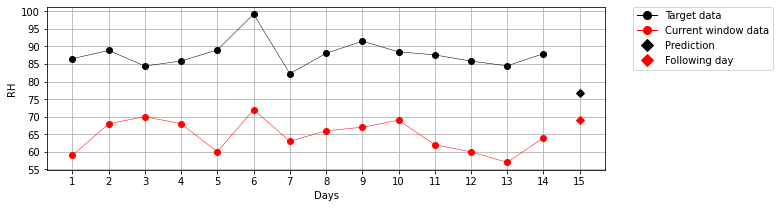

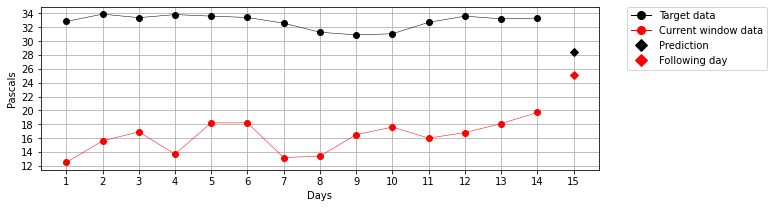

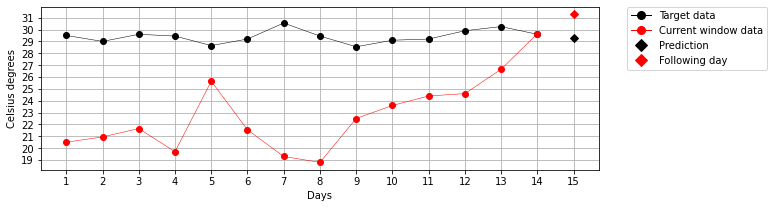

14


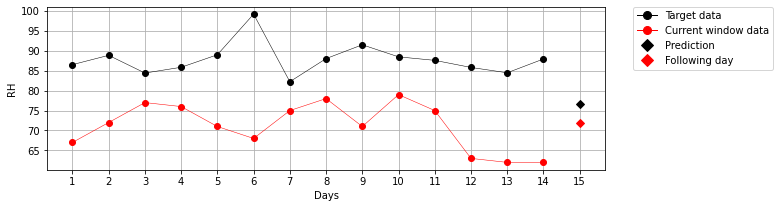

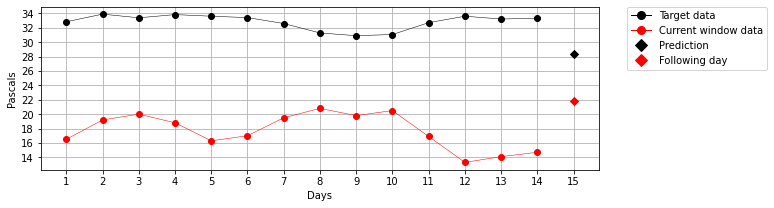

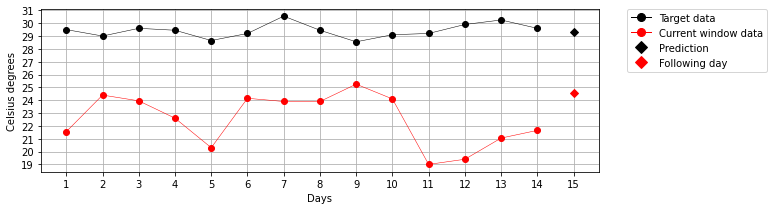

15


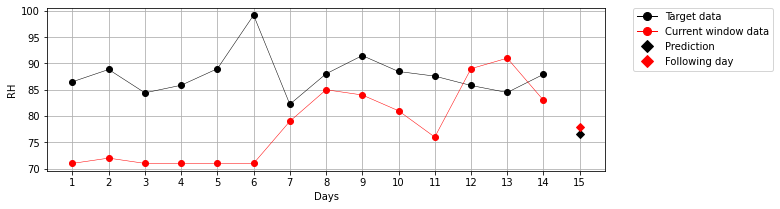

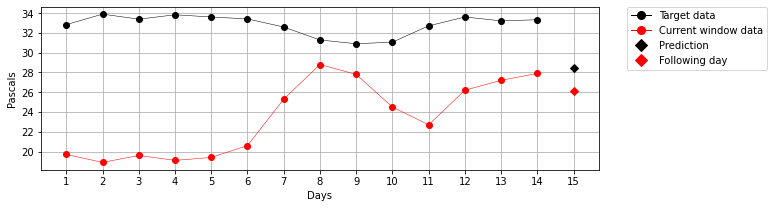

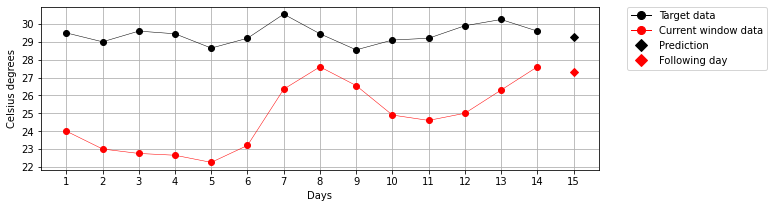

16


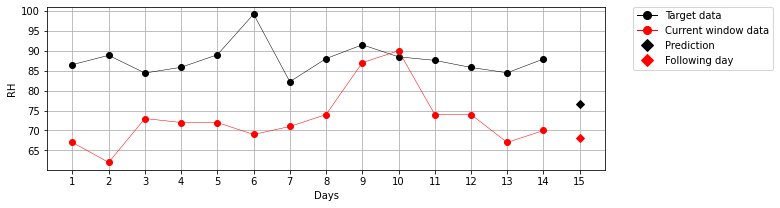

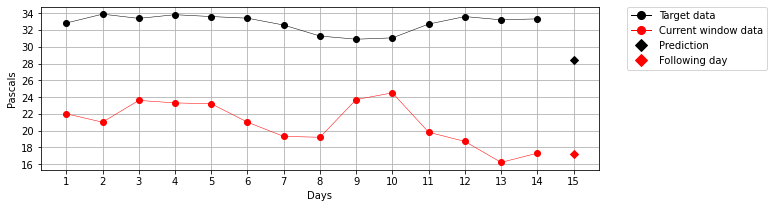

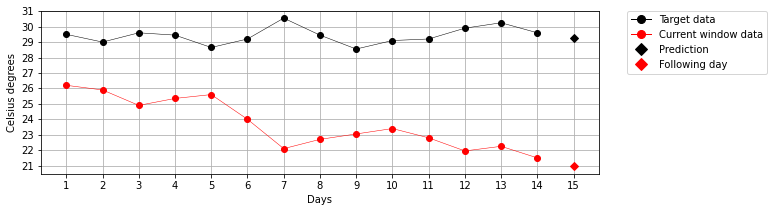

17


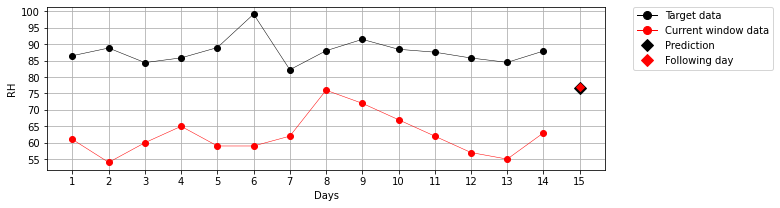

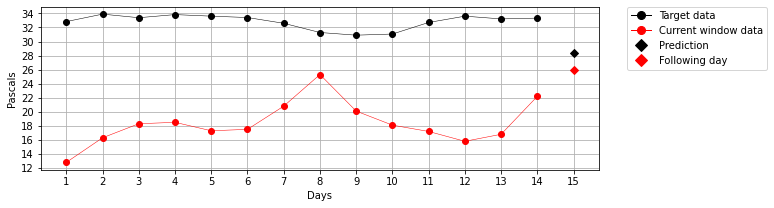

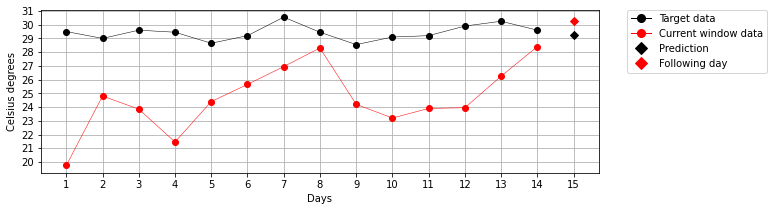

18


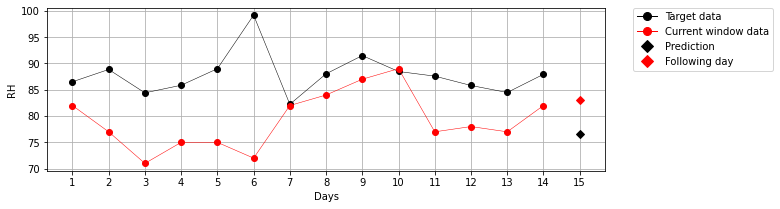

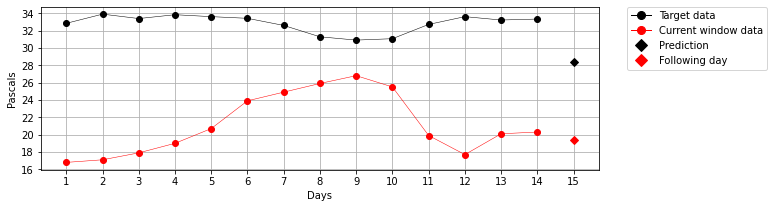

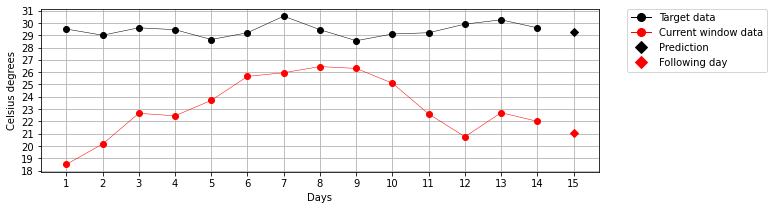

In [41]:
cont=np.arange(1,15)
targetMarker = mlines.Line2D([], [], color='black', marker='o',markersize=8,linewidth=1, label='Target data')
currentMarker = mlines.Line2D([], [], color='red', marker='o',markersize=8,linewidth=1, label='Current window data')
predictionMarker = mlines.Line2D([], [], color='black', marker='D',markersize=8,linewidth=0, label='Prediction')
nextMarker = mlines.Line2D([], [], color='red', marker='D',markersize=8,linewidth=0, label='Following day')
for i in range(len(listasP)-1):
    print(i+1)
    actualWin=list(listasP[i].keys())[-1]
    correlation[actualWin]
    plt.figure(figsize=(10,3))
    #plt.subplot(3,1,1)
    #plt.title("Comparison between window #{0} and the target window in the Humidity parameter".format(i+1))
    plt.xlabel('Days')
    plt.ylabel('RH')
    plt.yticks(range(20,101,5))
    plt.xticks(range(1,16,1))
    plt.plot(cont,slices[0][len(slices[0])-1], 'o-k',linewidth=0.5)
    plt.plot(cont,slices[0][actualWin], 'o-r',linewidth=0.5)
    winH=(slices[0][actualWin+1][13])-minHum/maxHum-minHum
    if(np.sqrt((prediction[2049][0]-slices[0][actualWin+1][13])**2<1)):
        plt.plot(15,prediction[2049][0],'Dk',markersize=8)
    else:
        plt.plot(15,prediction[2049][0],'Dk')
    plt.plot(15,slices[0][actualWin+1][13],'Dr')
    plt.grid()
    plt.legend(handles=[targetMarker,currentMarker,predictionMarker,nextMarker ],bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
    plt.show()
    #plt.subplot(3,1,2)
    plt.figure(figsize=(10,3))
    #plt.title("Comparison between window #{0} and the target window in the Atmospheric pressure parameter".format(i+1))
    plt.xlabel('Days')
    plt.ylabel('Pascals')
    plt.yticks(range(10,45,2))
    plt.xticks(range(1,16,1))
    plt.plot(cont,slices[1][len(slices[0])-1], 'o-k',linewidth=0.5)
    plt.plot(cont,slices[1][actualWin], 'o-r',linewidth=0.5)
    if(np.sqrt((prediction[2049][1]-slices[1][actualWin+1][13])**2)<.2):
        plt.plot(15,prediction[2049][1],'Dk',markersize=8)
    else:
        plt.plot(15,prediction[2049][1],'Dk')
    plt.plot(15,slices[1][actualWin+1][13],'Dr')
    plt.grid()
    plt.legend(handles=[targetMarker,currentMarker,predictionMarker,nextMarker ],bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
    plt.show()
    #plt.subplot(3,1,3)
    plt.figure(figsize=(10,3))
    #plt.title("Comparison between window #{0} and the target window in the temperature parameter".format(i+1))
    plt.xlabel('Days')
    plt.ylabel('Celsius degrees')
    plt.yticks(range(14,36,1))
    plt.xticks(range(1,16,1))
    plt.plot(cont,slices[2][len(slices[0])-1], 'o-k',linewidth=0.5)
    plt.plot(cont,slices[2][actualWin], 'o-r',linewidth=0.5)
    if(np.sqrt((prediction[2049][2]-slices[2][actualWin+1][13])**2)<.15):
        plt.plot(15,prediction[2049][2],'Dk',markersize=8)
    else:
        plt.plot(15,prediction[2049][2],'Dk')
    plt.plot(15,slices[2][actualWin+1][13],'Dr')
    #plt.tight_layout()
    plt.grid()
    plt.legend(handles=[targetMarker,currentMarker,predictionMarker,nextMarker ],bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
    plt.show()


In [42]:
dicTop10={}
for i in listasP:
    dicTop10[list(i.keys())[-1]]=correlation[list(i.keys())[-1]]
dictTop3 = OrderedDict(sorted(dicTop10.items(), key=lambda x: x[1]))
listTop3=list(dictTop3.keys())

In [43]:
maxHum,minHum=max(dataset[:,1]),min(dataset[:,1])
maxPre,minPre=max(dataset[:,4]),min(dataset[:,4])
maxTem,minTem=max(dataset[:,7]),min(dataset[:,7])
predH=(prediction[2049][0]-minHum)/(maxHum-minHum)
predP=(prediction[2049][1]-minPre)/(maxPre-minPre)
predT=(prediction[2049][2]-minTem)/(maxTem-minTem)
cont=0
MAE = []
corrList=[]
for i in listTop3[-10:]:
    corrList.append(correlation[i])
    try:
        actualDayH=((slices[0][i+1][13])-minHum)/(maxHum-minHum)
        actualDayP=((slices[1][i+1][13])-minPre)/(maxHum-minPre)
        actualDayT=((slices[2][i+1][13])-minTem)/(maxHum-minTem)
    except Exception:
        print("")
    print((abs(predH-actualDayH)+abs(predP-actualDayP)+abs(predT-actualDayT))/3)
    MAE.append((abs(predH-actualDayH)+abs(predP-actualDayP)+abs(predT-actualDayT))/3)
    cont+=(abs(predH-actualDayH)+abs(predP-actualDayP)+abs(predT-actualDayT))/3
print("promedio",cont/10)
cont=0

0.3612717161197266
0.3793284267354218
0.3343516524653883
0.4034823251540409
0.31559392960809834
0.39501412111955564
0.3254031899821123
0.3931695069477705
0.3466066517303911
0.3670644353064221
promedio 0.3621285955168927


In [46]:
dataF = {"Window":listTop3[-10:],"FCCI":corrList,"MAE":MAE}
print(pd.DataFrame(dataF))

   Window      FCCI       MAE
0    1103  0.789214  0.361272
1    6578  0.793346  0.379328
2     481  0.794548  0.334352
3    1439  0.797706  0.403482
4    4811  0.815159  0.315594
5    5506  0.837190  0.395014
6    3659  0.843797  0.325403
7    1840  0.854439  0.393170
8    2205  0.859157  0.346607
9    4002  0.869007  0.367064


ValueError: x and y must have same first dimension, but have shapes (1,) and (14,)

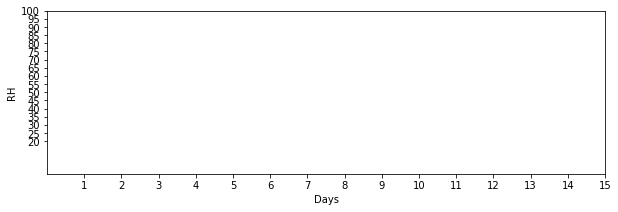

In [45]:
for i in listTop3[-3:]:
    plt.figure(figsize=(10,3))
    plt.xlabel('Days')
    plt.ylabel('RH')
    plt.yticks(range(20,101,5))
    plt.xticks(range(1,16,1))
    plt.plot(cont,slices[0][len(slices[0])-1], 'o-k',linewidth=0.5)
    plt.plot(cont,slices[0][i], 'o-r',linewidth=0.5)
    if(np.sqrt((prediction[2049][0]-slices[0][i+1][13])**2<.5)):
        plt.plot(15,prediction[2049][0],'Dk',markersize=8)
    else:
        plt.plot(15,prediction[2049][0],'Dk')
    plt.plot(15,slices[0][i+1][13],'Dr')
    plt.grid()
    plt.legend(handles=[targetMarker,currentMarker,predictionMarker,nextMarker ],bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
    plt.show()
    
    plt.figure(figsize=(10,3))
    plt.xlabel('Days')
    plt.ylabel('Pascals')
    plt.yticks(range(10,45,2))
    plt.xticks(range(1,16,1))
    plt.plot(cont,slices[1][len(slices[0])-1], 'o-k',linewidth=0.5)
    plt.plot(cont,slices[1][i], 'o-r',linewidth=0.5)
    if(np.sqrt((prediction[2049][1]-slices[1][i+1][13])**2)<.2):
        plt.plot(15,prediction[2049][1],'Dk',markersize=8)
    else:
        plt.plot(15,prediction[2049][1],'Dk')
    plt.plot(15,slices[1][i+1][13],'Dr')
    plt.grid()
    plt.legend(handles=[targetMarker,currentMarker,predictionMarker,nextMarker ],bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
    plt.show()
    
    plt.figure(figsize=(10,3))
    plt.xlabel('Days')
    plt.ylabel('Celsius degrees')
    plt.yticks(range(14,36,1))
    plt.xticks(range(1,16,1))
    plt.plot(cont,slices[2][len(slices[0])-1], 'o-k',linewidth=0.5)
    plt.plot(cont,slices[2][i], 'o-r',linewidth=0.5)
    if(np.sqrt((prediction[2049][2]-slices[2][i+1][13])**2)<.15):
        plt.plot(15,prediction[2049][2],'Dk',markersize=8)
    else:
        plt.plot(15,prediction[2049][2],'Dk')
    plt.plot(15,slices[2][i+1][13],'Dr')
    plt.grid()
    plt.legend(handles=[targetMarker,currentMarker,predictionMarker,nextMarker ],bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
    plt.show()